In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df = df.dropna()
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [6]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 RK', '4 BHK',
       '1 BHK', '5 BHK', '11 BHK', '5 Bedroom', '9 BHK', '2 Bedroom',
       '6 BHK', '7 BHK', '6 Bedroom'], dtype=object)

In [7]:
df['size']= df['size'].apply(lambda x: int(x.split(' ')[0]))
df['size'].unique()

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7], dtype=int64)

In [8]:
df1 = df.drop(['area_type', 'availability', 'society', 'balcony'], axis = 'columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
3,Lingadheeranahalli,3,1521,3.0,95.00
5,Whitefield,2,1170,2.0,38.00
11,Whitefield,4,2785,5.0,295.00


In [9]:
df.total_sqft[:50]

0            1056
1            2600
3            1521
5            1170
11           2785
12           1000
14           2250
15           1175
16           1180
17           1540
18           2770
21           1755
22           2800
24            510
26            660
28           1151
29           1025
30    2100 - 2850
31           1075
32           1760
33           1693
35            700
37           1724
41           1254
42            600
44        1330.74
46            970
47           1459
50           1270
51           1670
52           2010
53           1185
54           1600
55           1200
57           1500
61            845
62           5700
63           1160
66           1140
71           1358
72           1569
73           1240
74           2089
77           2511
80           1660
82           1326
84           1499
87            708
88           1060
90           1000
Name: total_sqft, dtype: object

In [10]:
def isFloat(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[1]) + float(tokens[0]))/2
    try:
        return float(x)
    except:
        return None

In [11]:
df1['total_sqft'] = df1['total_sqft'].apply(isFloat)
df1[200:400]

,location,size,total_sqft,bath,price
333,6th Phase JP Nagar,2,1192.0,2.0,74.0
334,Ulsoor,3,2135.0,3.0,215.0
335,Whitefield,2,1173.0,2.0,58.0
336,Uttarahalli,2,1020.0,2.0,45.0
337,Thigalarapalya,4,3122.0,6.0,230.0
...,...,...,...,...,...
672,Bettahalsoor,4,4046.0,4.0,445.0
674,Yelahanka,3,35000.0,3.0,130.0
683,Ambedkar Colony,3,1875.0,3.0,165.0
685,Brookefield,3,1200.0,3.0,140.0


In [12]:
df2 = df1.copy()

In [13]:
df2['price_per_sqft'] = df2['price']*100000 / df2['total_sqft']
df2.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
5,Whitefield,2,1170.0,2.0,38.00,3247.863248
11,Whitefield,4,2785.0,5.0,295.00,10592.459605


In [14]:
df2.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi',
       'Lingadheeranahalli', 'Whitefield', '7th Phase JP Nagar',
       'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Ramakrishnappa Layout', 'Binny Pete',
       'Thanisandra', ' Thanisandra', 'Electronic City',
       'Ramagondanahalli', 'Yelahanka', 'Hebbal', 'Kanakpura Road',
       'Kundalahalli', 'Sarjapur  Road', 'Ganga Nagar', 'Doddathoguru',
       'Adarsh Nagar', 'Bhoganhalli', 'Lakshminarayana Pura',
       'Begur Road', 'Varthur', 'Gunjur', 'Hegde Nagar', 'Haralur Road',
       'Hennur Road', 'Cholanayakanahalli', 'Kodanda Reddy Layout',
       'EPIP Zone', 'Dasanapura', 'Kasavanhalli', 'Sanjay nagar',
       'Kengeri', 'Yeshwanthpur', 'Chandapura', 'Kothanur',
       'Green View Layout', 'Shantiniketan Layout', 'Rajaji Nagar',
       'Devanahalli', 'Byatarayanapura', 'Akshaya Nagar',
       'LB Shastri Nagar', 'Hormavu', 'Peenya', 'Kudlu Gate',
       '8th Phase JP Nagar', 'Chandra Layout

In [15]:
df2['location'] = df2['location'].apply(lambda x: x.strip())
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                        398
Sarjapur  Road                    310
Electronic City                   238
Kanakpura Road                    216
Thanisandra                       215
                                 ... 
Kattigenahalli                      1
Kashi Nagar                         1
Kamakshipalya                       1
Kalhalli                            1
Yeshwanthpur Industrial Suburb      1
Name: location, Length: 626, dtype: int64

In [16]:
len(location_stats[location_stats<10])

472

In [17]:
location_stats_less_than_10 = location_stats[location_stats<10]
len(location_stats_less_than_10)

472

In [18]:
df2['location'] = df2['location'].apply(lambda x: 'others' if x in location_stats_less_than_10 else x)
len(df2['location'].unique())

155

In [19]:
df2.head()
df2.shape

(7496, 6)

In [20]:
df3=df2[df2.total_sqft/df2['size'] < 300]
df3.shape

(42, 6)

In [21]:
df3 = df2[~(df2.total_sqft/df2['size'] < 300)]
df3.shape

(7454, 6)

In [22]:
df3.price_per_sqft.describe()

count     7439.000000
mean      5851.020195
std       2705.465697
min        371.428571
25%       4283.397683
50%       5319.284802
75%       6693.881632
max      76530.612245
Name: price_per_sqft, dtype: float64

In [23]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mn = subdf.price_per_sqft.mean()
        sd = subdf.price_per_sqft.std()
        reduced_df = subdf[(subdf.price_per_sqft > (mn-sd)) & (subdf.price_per_sqft < (mn+sd))]
        df_out= pd.concat([df_out, reduced_df], ignore_index= True)
    return df_out

In [24]:
df4 = remove_pps_outlier(df3)
df4.shape

(5869, 6)

In [25]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df['size'] == 2)]
    bhk3 = df[(df.location == location) & (df['size'] == 3)]
    plt.rcParams['figure.figsize']= (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'green', label = '3 BHK', s = 50)
    plt.xlabel('Total Square feet area')
    plt.ylabel('Price Per sqft area')
    plt.title(location)
    plt.legend()

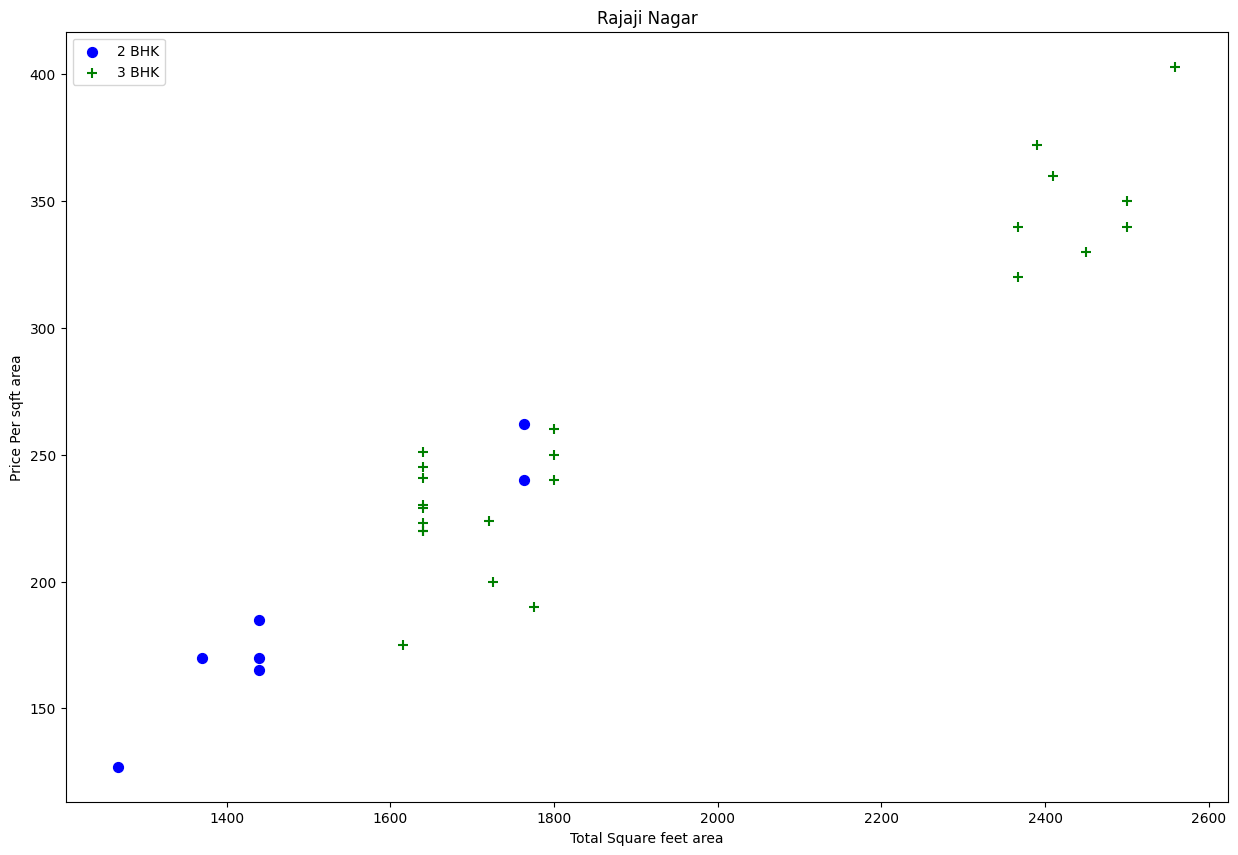

In [26]:
plot_scatter_chart(df4, 'Rajaji Nagar')

In [27]:
def remove_bhk_outliers(df):
    exclude_indices= np.array([])
    for location, location_df in df4.groupby('location'):
        bhk_stats ={}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk]= {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

df5 = remove_bhk_outliers(df4)
df5.shape

(4124, 6)

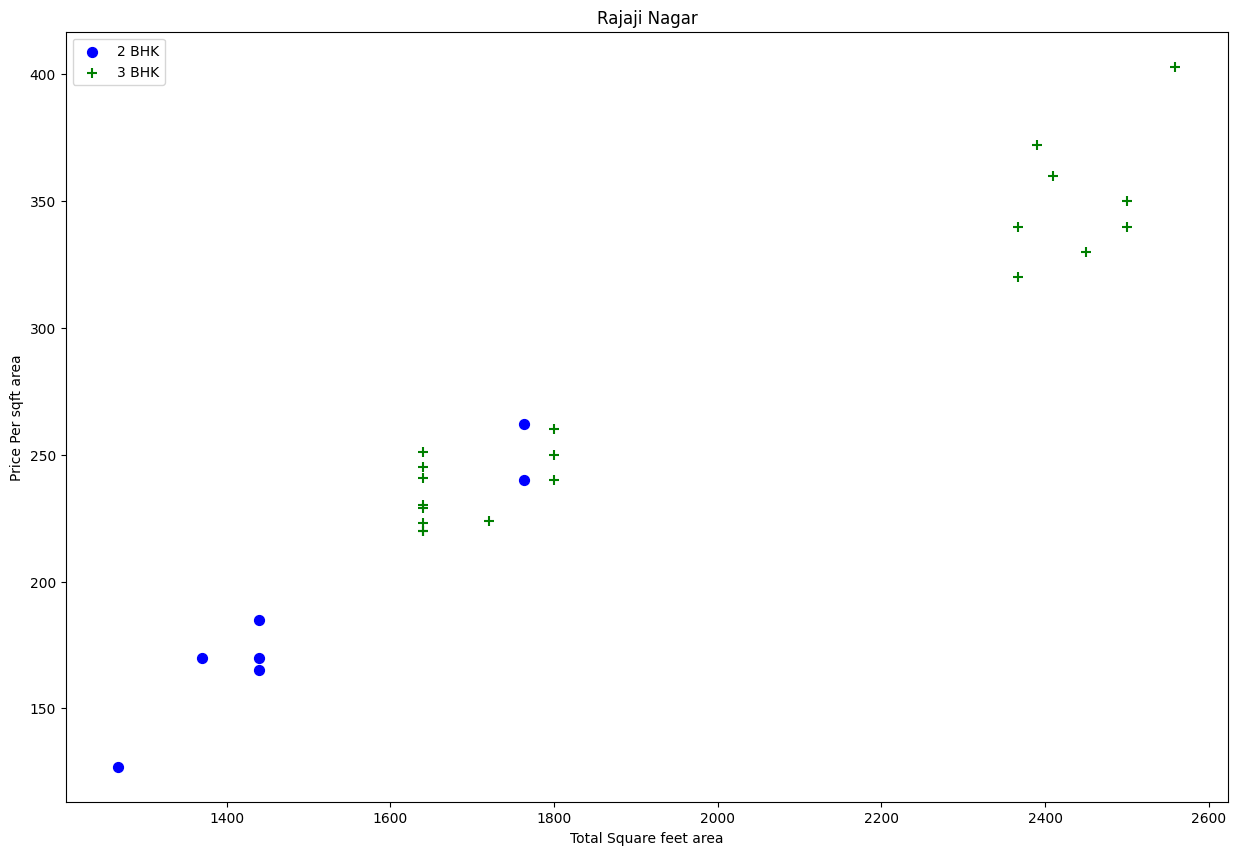

In [28]:
plot_scatter_chart(df5, 'Rajaji Nagar')

Text(0, 0.5, 'Count')

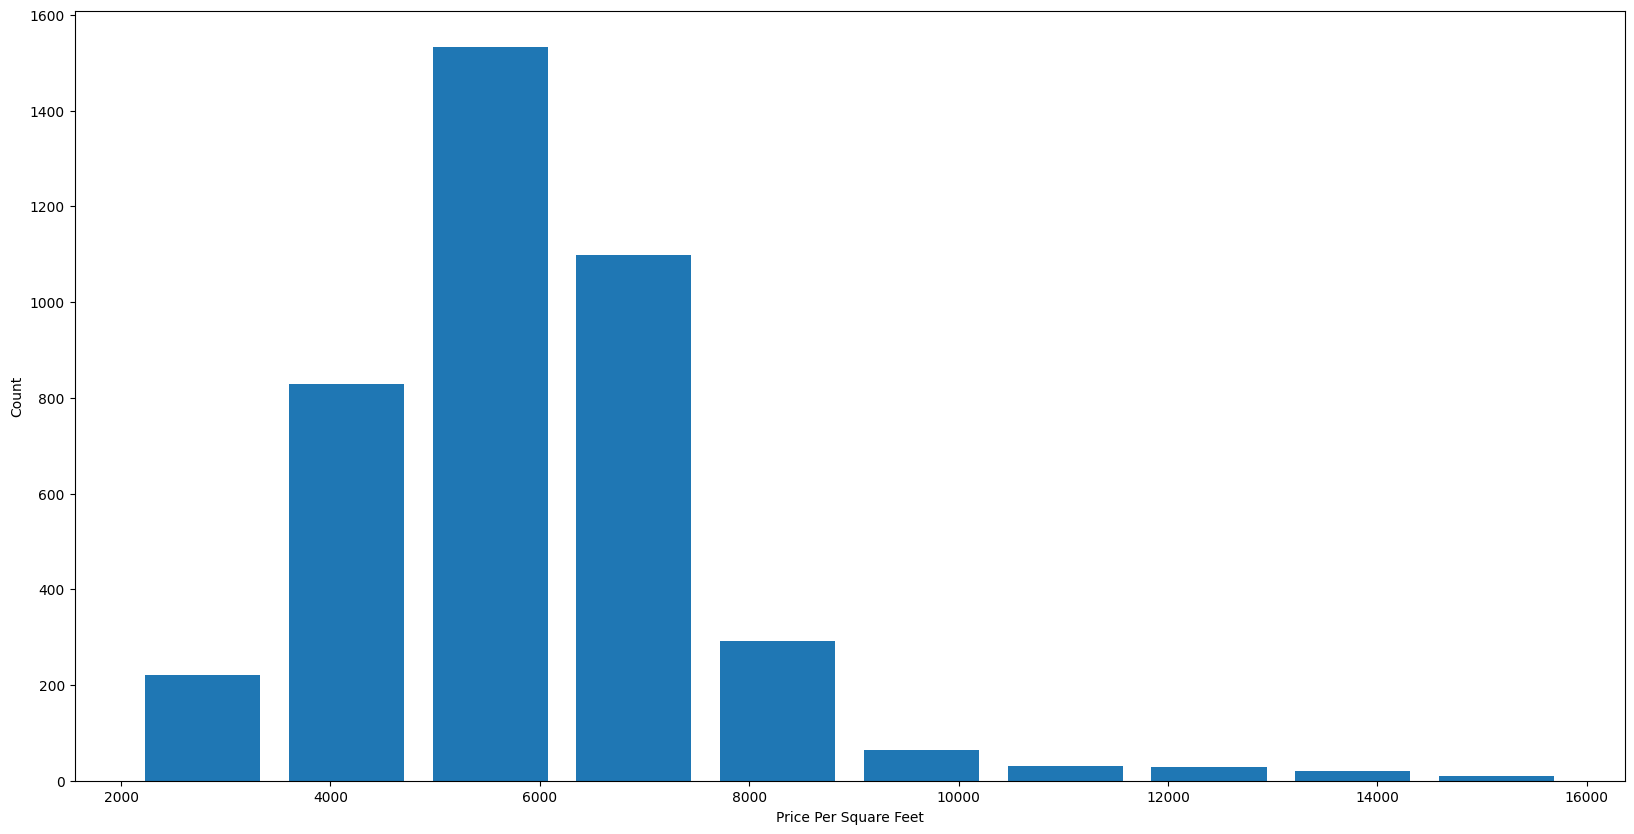

In [29]:
plt.rcParams['figure.figsize']= (20,10)
plt.hist(df5.price_per_sqft, rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [30]:
df5.bath.unique()

array([4., 3., 2., 5., 1., 6., 7., 9.])

In [31]:
df5[df5.bath>8]

,location,size,total_sqft,bath,price,price_per_sqft
4750,others,11,5000.0,9.0,360.0,7200.000000
4757,others,9,5000.0,9.0,210.0,4200.000000
4949,others,6,11338.0,9.0,1000.0,8819.897689


<Axes: xlabel='bath', ylabel='Count'>

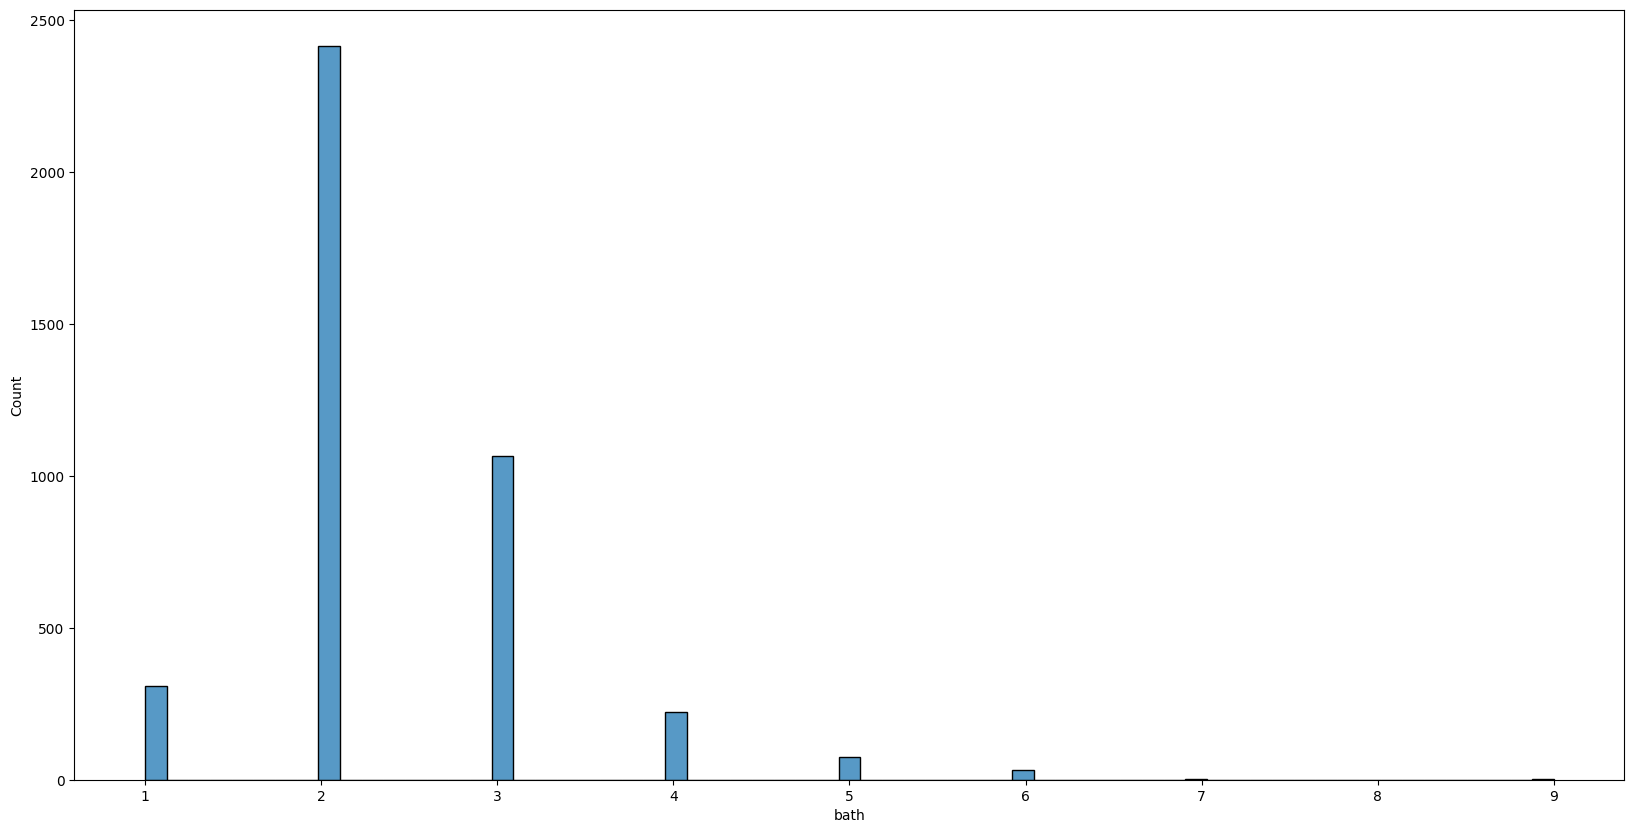

In [32]:
import seaborn as sn
sn.histplot(df5.bath)

In [33]:
df6 = df5[df5.bath < df5['size']+2]
df6.shape

(4077, 6)

In [34]:
df6.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,1st Phase JP Nagar,4,2825.0,4.0,250.0,8849.557522
1,1st Phase JP Nagar,3,1875.0,3.0,167.0,8906.666667
2,1st Phase JP Nagar,2,1394.0,2.0,100.0,7173.601148
3,1st Phase JP Nagar,2,1077.0,2.0,93.0,8635.097493
4,1st Phase JP Nagar,3,1590.0,3.0,131.0,8238.993711


In [35]:
df6= df6.drop('price_per_sqft', axis= 'columns')
df6.head()

,location,size,total_sqft,bath,price
0,1st Phase JP Nagar,4,2825.0,4.0,250.0
1,1st Phase JP Nagar,3,1875.0,3.0,167.0
2,1st Phase JP Nagar,2,1394.0,2.0,100.0
3,1st Phase JP Nagar,2,1077.0,2.0,93.0
4,1st Phase JP Nagar,3,1590.0,3.0,131.0


In [36]:
dummies=pd.get_dummies(df6.location).astype(int)
dummies

,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
df7 = pd.concat([df6, dummies.drop('others', axis='columns')], axis='columns')
df7.head()

,location,size,total_sqft,bath,price,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1st Phase JP Nagar,4,2825.0,4.0,250.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Phase JP Nagar,3,1875.0,3.0,167.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Phase JP Nagar,2,1394.0,2.0,100.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,2,1077.0,2.0,93.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Phase JP Nagar,3,1590.0,3.0,131.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df7 = df7.drop('location', axis = 'columns')
df7.head()

,size,total_sqft,bath,price,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,4,2825.0,4.0,250.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1875.0,3.0,167.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1394.0,2.0,100.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1077.0,2.0,93.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1590.0,3.0,131.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X = df7.drop('price', axis = 'columns')
X.head()

,size,total_sqft,bath,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,4,2825.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1875.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1394.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1077.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1590.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y = df7.price
y

0       250.0
1       167.0
2       100.0
3        93.0
4       131.0
        ...  
5860     64.0
5861     77.0
5863     57.0
5865     65.0
5866    110.0
Name: price, Length: 4077, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

In [42]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.9260908714336048

In [43]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, random_state=0, test_size=0.2)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.92404166, 0.91198059, 0.92835091, 0.92838268, 0.92841772])

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

c:\Users\anayp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anayp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anayp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\Users\anayp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py",

,model,best_score,best_params
0,linear_regression,0.924235,{'fit_intercept': True}
1,lasso,0.795536,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.876224,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [45]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x= np.zeros(len(X.columns))
    x[0]= bhk
    x[1]= sqft
    x[2]= bath
    if loc_index >=0 :
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [46]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

c:\Users\anayp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.429273868134

In [47]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)

c:\Users\anayp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.20795954121505

In [48]:
predict_price('Indira Nagar', 1000, 2, 2)

c:\Users\anayp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


123.21025594381108

In [49]:
import pickle
with open('banglore_home_price_prediction_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [50]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))